# Explore observation data

* In-situ (buoy/station) data
    - Water level
* Satellite altimetry data (water level)

Note: The MIKE IO and ModelSkill packages are used here for convenient plotting functionality. They are not required for working with the observation data. 

In [1]:
import pandas as pd
import mikeio
import modelskill as ms
import helper as h
import matplotlib.pyplot as plt

In [2]:
fldr = "../observations/" 
msh = mikeio.open("../input/Mesh_8000_elems.mesh")

## In-situ stations

Note: some station coordinates have been moved to fit within the model domain.

In [3]:
df_stn = pd.read_csv(fldr + "stations.csv", index_col=0)
df_stn

,Longitude,Latitude
station,,
NWA,3.135779,53.381352
IJVA,3.710438,52.883814
DDW1A,5.368098,54.197720
F3platform,4.720000,54.849995
K13a,3.219000,53.217999
Europlatform,3.280000,52.000000
J61,2.943804,53.823250
Helgoland,7.890000,54.178902
K141,3.626200,53.269001


## Water level stations

In [4]:
wllist = h.get_wl_point_obs()

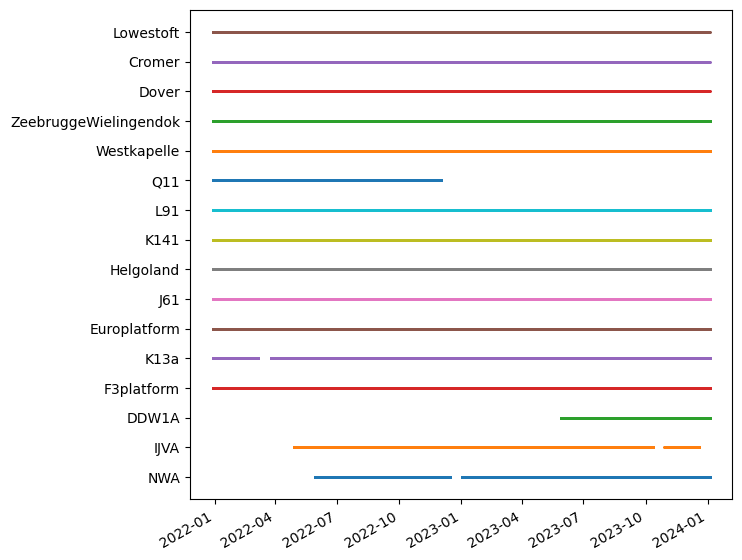

In [5]:
ms.plotting.temporal_coverage(wllist);

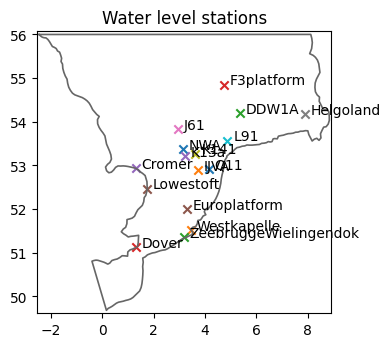

In [6]:
ms.plotting.spatial_overview(wllist, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
plt.title("Water level stations")
plt.savefig("../figures/stations.png")

# Current stations

In [10]:
ulist, vlist = h.get_u_v_point_obs()

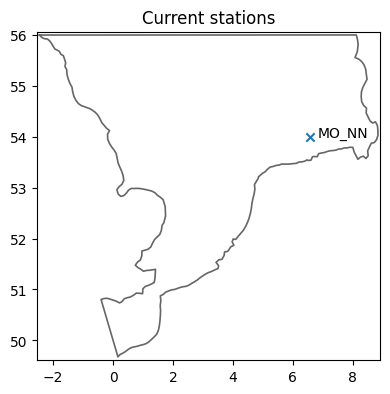

In [11]:
ms.plotting.spatial_overview(ulist, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
plt.title("Current stations")
plt.savefig("../figures/stations_currents.png")

## Altimetry 

In [12]:
altlist = h.get_altimetry_obs(quality=None)

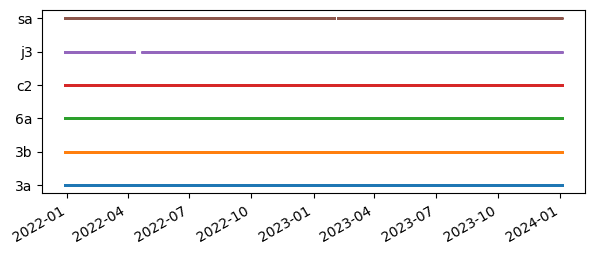

In [13]:
ms.plotting.temporal_coverage(altlist);

In [14]:
altlist_jan22 = [al.sel(time=slice("2022-01-01","2022-01-31")) for al in altlist]    

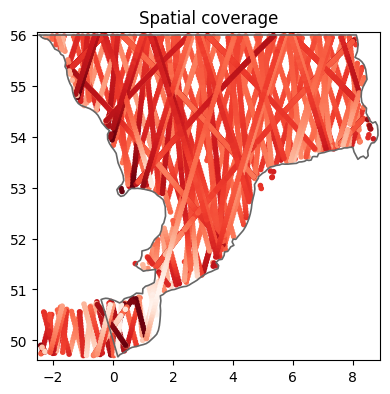

In [15]:
ms.plotting.spatial_overview(altlist_jan22, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
plt.savefig("../figures/altimetry_coverage.png")